## Making Pretty Matplotlib Plots Using rcParams

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns

import cmasher as cmr
%matplotlib inline

# This is here to copy the default rcParams to compare between plots
old_rc = plt.rcParams.copy()

In [2]:
# There are a bunch of built in Matplotlib style sheets 
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


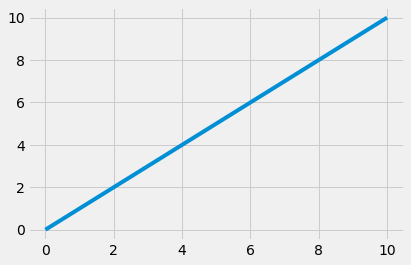

In [3]:
# It's possible to set a style sheet for a particular plot
# and completly change the the 

with plt.style.context('fivethirtyeight'):
    x = np.linspace(0, 10, 10)
    plt.plot(x, x)

Each time that matplotlib loads it loads the defaults style for all the plots. These defaults are stored in a dictionary called `plt.rcParams`.

We can take advantage of this by changing these defaults within our code by updating them with our own dictionary of parameters.

In [4]:
# This prints out all of the rcParams and their keywords.
print(plt.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: h264
animation.convert_args: []
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.html_args: []
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-7, 7]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes

In [5]:
# Here I can created my own dictionary of parameters that I use on my plots.
# We can update the matplotlib defaults now by simply:
#
# plt.rcParams.update(get_rc_params())

def get_rc_params():
    """
    Get the rcParams that will be used in all the plots.
    """

    rc_params = {
        "text.usetex": True,

        "figure.dpi": 125,
        "legend.fontsize": 12,
        "legend.frameon": False,
        "legend.markerscale": 1.0,

        "axes.labelsize": 18,

        "xtick.direction": 'in',
        "xtick.labelsize": 14,
        "xtick.minor.visible": True,
        "xtick.top": True,
        "xtick.major.width": 1,

        "ytick.direction": 'in',
        "ytick.labelsize": 14,
        "ytick.minor.visible": True,
        "ytick.right": True,
        "ytick.major.width": 1,
    }

    return rc_params





In [6]:
# First we need to make some data to plot

np.random.seed(1313)

def get_scatter_data(num_points=10):
    """
    Generates data to be used in a scatter plot
    """

    x = np.linspace(0, 10, num_points)
    y = x**2 + 3*x

    # Add gaussian random noise
    y +=np.random.normal(40, 20, num_points)

    yerr = stats.norm.rvs(loc=15, scale=5, size=num_points)

    return x, y, yerr

def get_image_data(mu=50, sigma=10):
    """
    Generates a grid of data similar to an image
    """
    x, y = np.meshgrid(np.linspace(-80,80,100), np.linspace(-80,80,100))
    d = np.sqrt(x*x+y*y)
    return x, y, np.exp(-((d-mu)**2 / ( 2.0 * sigma**2 ))) 

def get_poly_data(num_poly=5):
    """
    Generates a series of polynomials
    """

    x = np.linspace(0, 10, 100)

    y_list = np.zeros((num_poly, 100))
    for idx in range(1, num_poly+1):
        y = (-1)**idx * x**2 + idx**3*x*np.sin(idx * x)
        y_list[idx - 1][:] = y

    return x, y_list

## Plotting Example 1: 

/Users/abatten/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/abatten/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/abatten/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/abatten/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/abatten/opt/anaconda3/lib/python3.7/_collections_abc.py:841: 

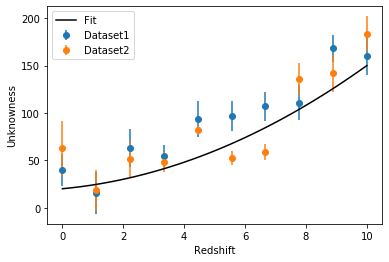

In [7]:
# Simple Plot

def plot_scatter():


    plt.rcParams.update(old_rc)

    # Get the data
    x, y, yerr = get_scatter_data()
    x2, y2, yerr2 = get_scatter_data()
    fitx = np.linspace(0, 10, 100)
    fity = fitx**2 + 3 * fitx + 20

    # Plot the data
    plt.errorbar(x, y, yerr=yerr, fmt='o', label="Dataset1")
    plt.errorbar(x2, y2, yerr=yerr2, fmt='o', label="Dataset2")
    plt.plot(fitx, fity, color="k", label="Fit")

    plt.xlabel("Redshift")
    plt.ylabel("Unknowness")
    plt.legend()

plot_scatter()

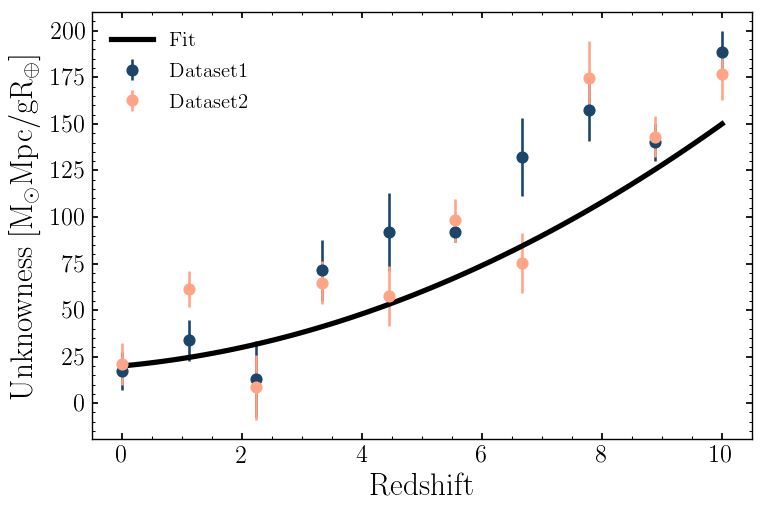

In [20]:
# Better Plot

def plot_scatter_better(passed_ax=None):
    x, y, yerr = get_scatter_data()
    x2, y2, yerr2 = get_scatter_data()
    fitx = np.linspace(0, 10, 100)
    fity = fitx**2 + 3 * fitx + 20
    
    # Update the plotting defaults with our params  
    plt.rcParams.update(get_rc_params())

    if passed_ax:
        ax = passed_ax
    else:
        fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True)

    # Use colours that are colourblind friendly and work in greyscale.
    colours = cmr.take_cmap_colors('cmr.dusk', 2, (0.3, 0.8))

    # Use dictionaries to seperate out plot style from plotting itself.
    dataset1_plotsty = {
        'color': colours[0],
        'fmt': 'o',
        'label': "\\textrm{Dataset1}",
    }

    dataset2_plotsty = {
        'color': colours[1],
        'fmt': 'o',
        'label': "\\textrm{Dataset2}",
    }

    fit_plotsty = {
        'color': 'black',
        'linewidth': 3,
        'linestyle': "-",
        'label': "\\textrm{Fit}",
    }

    # Plot the data
    # You can 'unpack' as dictionary into keyword arguments using **
    ax.errorbar(x, y, yerr=yerr, **dataset1_plotsty)
    ax.errorbar(x2, y2, yerr=yerr2, **dataset2_plotsty)
    ax.plot(fitx, fity, **fit_plotsty)

    # You can use this line to force the x-axis to always have integer values.
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))

    # Use LaTeX for making labels
    ax.set_xlabel("\\textrm{Redshift}")
    ax.set_ylabel("\\textrm{Unknowness}\ $\mathrm{\left[M_\odot Mpc/ g R_\oplus \\right]}$")
    ax.legend()

    
    # If we originally passed it an axis to plot on
    # Return that axis.
    if passed_ax:
        return ax

plot_scatter_better()

## Plotting Example 2: Image Data

/Users/abatten/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/abatten/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/abatten/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/abatten/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/abatten/opt/anaconda3/lib/python3.7/_collections_abc.py:841: 

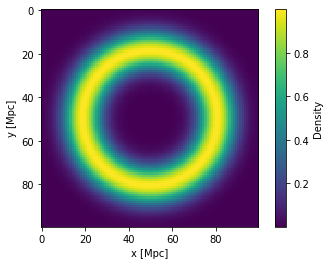

In [9]:
def plot_image_data():
    plt.rcParams.update(old_rc)


    x, y, image_data = get_image_data()
    im = plt.imshow(image_data)

    plt.xlabel("x [Mpc]")
    plt.ylabel("y [Mpc]")

    plt.colorbar(im, label="Density")

plot_image_data()


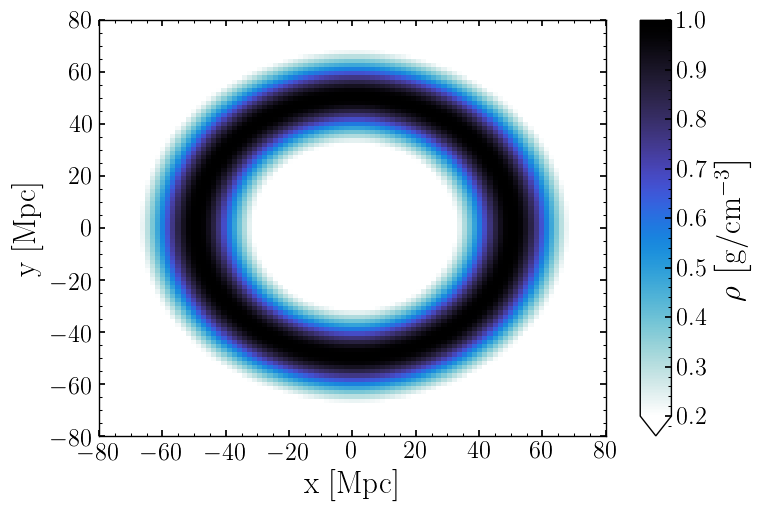

In [10]:
def plot_image_data_better(passed_ax=None):
    
    # Update the plotting defaults with our params
    plt.rcParams.update(get_rc_params())

    x, y, image_data = get_image_data()

    if passed_ax:
        ax = passed_ax
    else:
        fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True)


    im_plotsty = {
        "cmap": cmr.freeze_r,
        "vmax": 1,
        "vmin": 0.2,
    }

    # Pcolormesh is much better than imshow.
    # It can use rectangle pixels!
    im = ax.pcolormesh(x, y, image_data, **im_plotsty)

    
    cbar_sty = {
        "extend": "min", 
        "label": "$\\rho\ \mathrm{\left[g / cm^{-3}\\right]}$",
    }
    
    plt.colorbar(im, ax=ax, **cbar_sty)

    ax.set_xlabel("\\textrm{x\ [Mpc]}")
    ax.set_ylabel("\\textrm{y\ [Mpc]}")

    # These make sure the that the axis use the same values, round to nearest 10 or integer.
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))

    if passed_ax:
        return ax

plot_image_data_better()

/Users/abatten/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/abatten/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/abatten/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/abatten/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/abatten/opt/anaconda3/lib/python3.7/_collections_abc.py:841: 

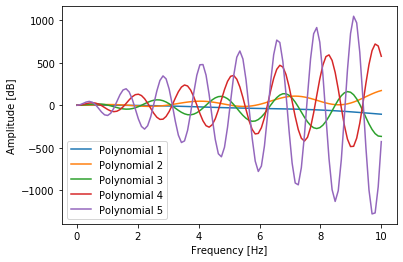

In [11]:
def plot_poly_data(num_poly=5):
    plt.rcParams.update(old_rc)
    x, yList = get_poly_data(num_poly=num_poly)

    for idx in range(num_poly):
        plt.plot(x, yList[:][idx], label=f"Polynomial {idx+1}")

    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude [dB]")
    plt.legend()

plot_poly_data()

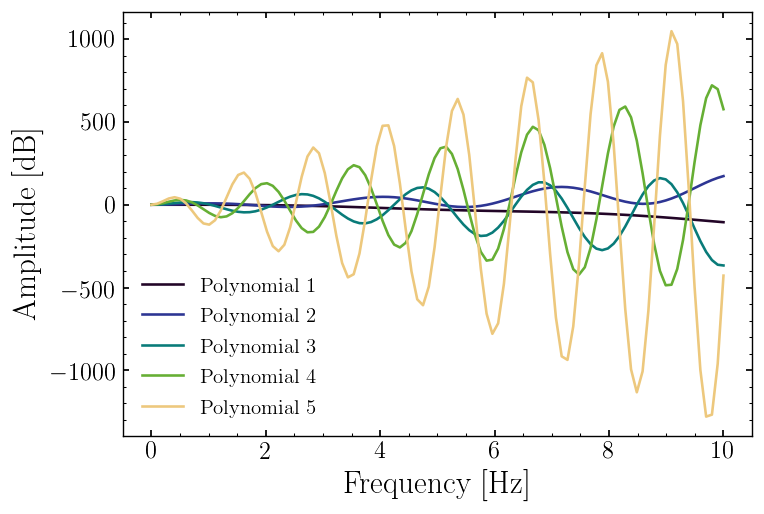

In [19]:
def plot_poly_data_better(num_poly=5, passed_ax=None):
    
    # Update the plotting defaults with our params
    plt.rcParams.update(get_rc_params())

    if passed_ax:
        ax = passed_ax
    else:
        fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True)

    x, y = get_poly_data(num_poly=num_poly)
    
    # Take a series of colours from a colour map to plot them.
    colours = cmr.take_cmap_colors("cmr.rainforest", num_poly, (0.1, 0.85), return_hex=True)


    for idx in range(num_poly):
        poly_plotsty = {
            'color': colours[idx],
            'label': f"$\\mathrm{{Polynomial}}\ {idx+1}$",
        }

        ax.plot(x, y[:][idx], **poly_plotsty)


    ax.set_xlabel("\\textrm{Frequency [Hz]}")
    ax.set_ylabel("\\textrm{Amplitude [dB]}")
    ax.legend()

    if passed_ax:
        return ax

plot_poly_data_better()

Text(0, 0.5, '\\textrm{Unknowness}')

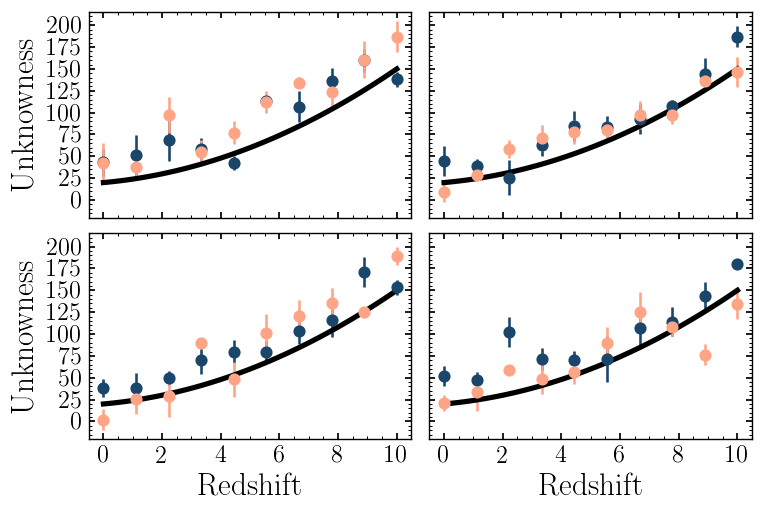

In [16]:
# By Using "passed_ax" it makes it really easy to replicate plots.

fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True, constrained_layout=True)

axes[0][0] = plot_scatter_better(passed_ax=axes[0][0])
axes[0][1] = plot_scatter_better(passed_ax=axes[0][1])
axes[1][0] = plot_scatter_better(passed_ax=axes[1][0])
axes[1][1] = plot_scatter_better(passed_ax=axes[1][1])


plt.setp(axes[0][0].get_xticklabels(), visible=False)
plt.setp(axes[0][1].get_xticklabels(), visible=False)

axes[1][0].set_xlabel("\\textrm{Redshift}")
axes[1][1].set_xlabel("\\textrm{Redshift}")

axes[0][0].set_ylabel("\\textrm{Unknowness}")
axes[1][0].set_ylabel("\\textrm{Unknowness}")

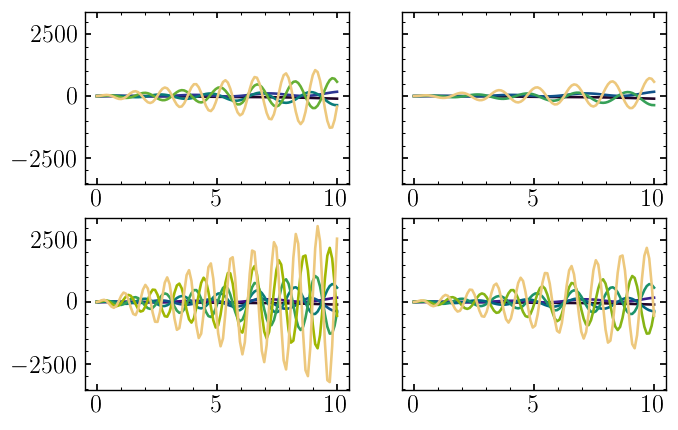

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True)

axes[0][0] = plot_poly_data_better(passed_ax=axes[0][0])
axes[0][1] = plot_poly_data_better(num_poly=4, passed_ax=axes[0][1])
axes[1][0] = plot_poly_data_better(num_poly=7, passed_ax=axes[1][0])
axes[1][1] = plot_poly_data_better(num_poly=6, passed_ax=axes[1][1])